# Hipparcos Luminosity Class Classifier with KNN, SVC and Decision Tree (Test)

In [1]:
!python --version

Python 3.6.4 :: Anaconda, Inc.


Data acquisition and cleaning techniques were derived from Eduardo Martín Calleja's 

Construction of Hertzsprung-Russell diagrams in Python

Main Reference: http://balbuceosastropy.blogspot.com/2014/03/construction-of-hertzsprung-russell.html

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

Import hipparcos.tsv file.

In [3]:
df = pd.read_table('hipparcos.tsv', skiprows=44, sep=';', header=None, index_col=0,
                   names = ['HIP', 'Vmag', 'Plx', 'CI', 'SpType'],
                   skipfooter=1, engine='python')
df.tail()

,Vmag,Plx,CI,SpType
HIP,,,,
118318,6.99,1.92,1.595,K2
118319,8.23,10.63,0.639,G2V
118320,7.59,5.00,0.999,K0
118321,9.20,19.22,0.698,G5V
118322,4.49,8.71,-0.075,B9IV


Check for spaces, convert them to nan and remove.

In [4]:
df.describe()

,Vmag,Plx,CI,SpType
count,118218,118218,118218,115184
unique,1127,5617,2437,4124
top,8.69,,,K0
freq,504,263,1281,8570


In [5]:
df = df.applymap(lambda x: np.nan if isinstance(x, str)
                       and x.isspace() else x)
df.describe()

,Vmag,Plx,CI,SpType
count,118217,117955,116937,115184
unique,1126,5616,2436,4124
top,8.69,2.93,1.000,K0
freq,504,183,317,8570


Remove the other nan values.

In [6]:
df = df.dropna()
df.describe()

,Vmag,Plx,CI,SpType
count,114472,114472,114472,114472
unique,1072,5361,2426,4070
top,8.69,2.93,1.000,K0
freq,502,182,308,8537


In [7]:
df.shape

(114472, 4)

Convert the ff. to float.

In [8]:
df['Vmag'] = df['Vmag'].astype(np.float)
df['Plx'] = df['Plx'].astype(np.float)
df['CI'] = df['CI'].astype(np.float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114472 entries, 1 to 118322
Data columns (total 4 columns):
Vmag      114472 non-null float64
Plx       114472 non-null float64
CI        114472 non-null float64
SpType    114472 non-null object
dtypes: float64(3), object(1)
memory usage: 4.4+ MB


Add absmag column.

In [9]:
df['Absmag'] = df['Vmag'] + 5 * np.log10(df['Plx']/100.)

C:\Users\LLagman\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
C:\Users\LLagman\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


In [10]:
df.describe()

,Vmag,Plx,CI,Absmag
count,114472.000000,114472.000000,114472.000000,1.107700e+05
mean,8.297756,7.105059,0.702421,-inf
std,1.248646,11.063782,0.490229,NaN
min,-1.440000,-35.100000,-0.400000,-inf
25%,7.610000,2.520000,0.341000,2.576435e-01
50%,8.400000,4.580000,0.605000,1.504575e+00
75%,9.070000,8.260000,1.075000,3.050985e+00
max,13.610000,772.330000,5.460000,1.544901e+01


Convert negative infinities to nan then remove them.

In [11]:
df = df.replace([-np.inf], np.nan).dropna()
df.describe()

,Vmag,Plx,CI,Absmag
count,110726.000000,110726.000000,110726.000000,110726.000000
mean,8.268266,7.386535,0.697777,1.601420
std,1.243306,11.133374,0.483801,2.329619
min,-1.440000,0.010000,-0.400000,-13.310000
25%,7.590000,2.700000,0.344000,0.259416
50%,8.380000,4.740000,0.602000,1.505791
75%,9.050000,8.460000,1.068000,3.051987
max,13.110000,772.330000,5.460000,15.449015


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110726 entries, 1 to 118322
Data columns (total 5 columns):
Vmag      110726 non-null float64
Plx       110726 non-null float64
CI        110726 non-null float64
SpType    110726 non-null object
Absmag    110726 non-null float64
dtypes: float64(4), object(1)
memory usage: 5.1+ MB


# Make a simple HR Diagram

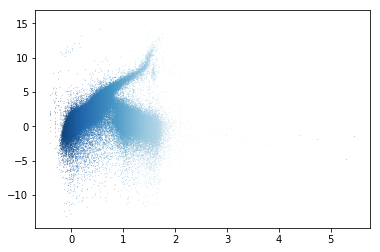

In [13]:
plt.scatter(df['CI'],df['Absmag'],marker='.',s=1.5, linewidth=0, c=df['CI'],cmap='RdBu_r')

(16.88851420488482, -5.25)

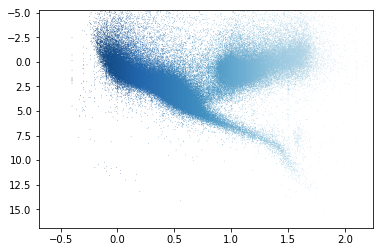

In [14]:
fig,ax = plt.subplots()
ax.scatter(df['CI'],df['Absmag'],marker='.',s=1.5, linewidth=0, c=df['CI'],cmap='RdBu_r')
ax.invert_yaxis()
ax.set_xlim(xmax = 2.25)
ax.set_ylim(ymax=-5.25)

Color would depend on Color Index Values, then apply cmap.

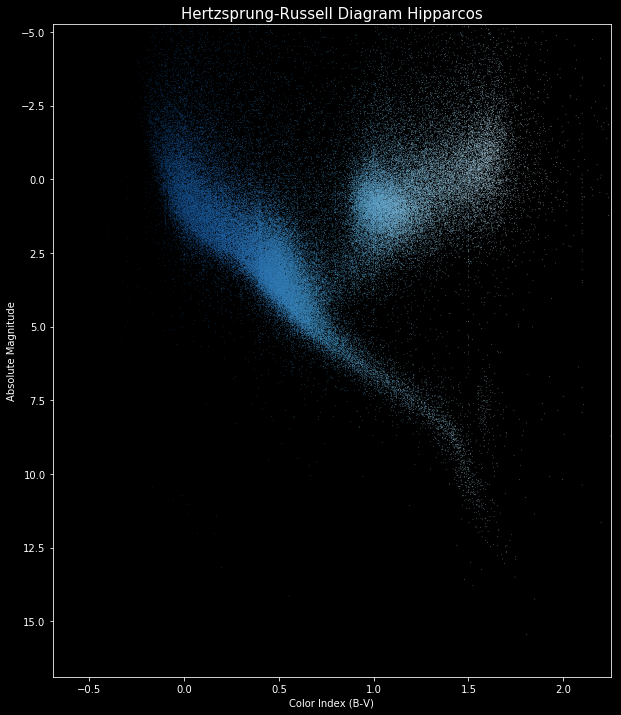

In [15]:
fig,ax = plt.subplots(figsize=(10, 12),facecolor='black')

ax.scatter(df['CI'],df['Absmag'],marker='.',s=1.5, linewidth=0, c=df['CI'],cmap='RdBu_r')

ax.set_facecolor('black')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['bottom'].set_color('white')

ax.set_title('Hertzsprung-Russell Diagram Hipparcos', color='white', fontsize=15)
ax.set_xlabel('Color Index (B-V)', color='white')
ax.set_ylabel('Absolute Magnitude', color='white')

ax.invert_yaxis()
ax.set_xlim(xmax = 2.25)
ax.set_ylim(ymax=-5.25)
ax.tick_params(colors='white')

Exclude very faint stars by limiting Color Index values to less than 2 so that the cmap would be properly applied.

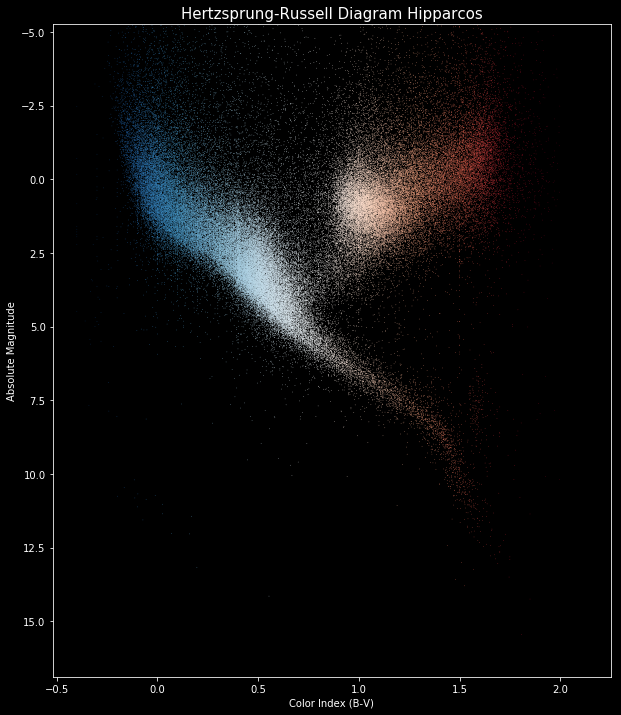

In [16]:
fig,ax = plt.subplots(figsize=(10, 12),facecolor='black')

ax.scatter(df.query('CI < 2')['CI'], 
           df.query('CI < 2')['Absmag'], 
           marker='.', 
           s=1.5, 
           linewidth=0, 
           c=df.query('CI < 2')['CI'], 
           cmap='RdBu_r')

ax.set_facecolor('black')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['bottom'].set_color('white')

ax.set_title('Hertzsprung-Russell Diagram Hipparcos', color='white', fontsize=15)
ax.set_xlabel('Color Index (B-V)', color='white')
ax.set_ylabel('Absolute Magnitude', color='white')

ax.invert_yaxis()
ax.set_xlim(xmax = 2.25)
ax.set_ylim(ymax=-5.25)
ax.tick_params(colors='white')

Check Luminosity classes.

In [17]:
a = df['SpType'].map(lambda s: 'VII' in s)
print ("Class VII: white dwarfs, there are %d stars" %sum(a))

b = df['SpType'].map(lambda s: ('VI' in s) and ('VII' not in s))
print ("Class VI: subdwarfs, there are %d stars" %sum(b))

c = df['SpType'].map(lambda s: ('V' in s) and ('VI' not in s) and ('IV' not in s))
print ("Class V: main-sequence, there are %d stars" %sum(c))

d = df['SpType'].map(lambda s: 'IV' in s)
print ("Class IV: subgiants, there are %d stars" %sum(d))

e = df['SpType'].map(lambda s: 'III' in s)
print ("Class III: giants, there are %d stars" %sum(e))

f = df['SpType'].map(lambda s: ('II' in s) and ('III' not in s) and ('VII' not in s))
print ("Class II:  bright giants, there are %d stars" %sum(f))

g = df['SpType'].map(lambda s: ('I' in s) and ('II' not in s) and ('V' not in s))
print ("Class I: supergiants, there are %d stars" %sum(g))

print ("Total: %d stars" %(sum(a)+sum(b)+sum(c)+sum(d)+sum(e)+sum(f)+sum(g)))

Class VII: white dwarfs, there are 2 stars
Class VI: subdwarfs, there are 16 stars
Class V: main-sequence, there are 24373 stars
Class IV: subgiants, there are 7799 stars
Class III: giants, there are 21846 stars
Class II:  bright giants, there are 1163 stars
Class I: supergiants, there are 755 stars
Total: 55954 stars


# KNN, SVC and Decision Tree Classifier

# LumClass Filter I

Create test df from df.

In [18]:
test = df.copy()

Try extracting the Roman numerals only, then create LumClass column.

In [19]:
test['LumClass'] = test['SpType'].str.extract('([IV|V?I$]{1,3})', expand=True)
test['LumClass'].value_counts()

V      24381
III    21169
IV      6282
II      1663
I        923
VII        2
Name: LumClass, dtype: int64

Check total number of stars with luminosity classes.

In [20]:
test['LumClass'].value_counts().sum()

54420

In [21]:
test.head()

,Vmag,Plx,CI,SpType,Absmag,LumClass
HIP,,,,,,
1,9.10,3.54,0.482,F5,1.845016,NaN
2,9.27,21.90,0.999,K3V,5.972221,V
3,6.61,2.81,-0.019,B9,-1.146468,NaN
4,8.06,7.75,0.370,F0V,2.506509,V
5,8.55,2.87,0.902,G8III,0.839409,III


View info of first 5 stars per luminosity class ordered by HIP number.

In [22]:
test[test['LumClass']=='VII'].head()

,Vmag,Plx,CI,SpType,Absmag,LumClass
HIP,,,,,,
45266,10.19,4.11,2.570,CVIIe,3.259209,VII
77982,5.11,1.09,1.108,G6VII,-4.702868,VII


In [23]:
test[test['LumClass']=='VI'].head()

,Vmag,Plx,CI,SpType,Absmag,LumClass
HIP,,,,,,


In [24]:
test[test['LumClass']=='V'].head()

,Vmag,Plx,CI,SpType,Absmag,LumClass
HIP,,,,,,
2,9.27,21.90,0.999,K3V,5.972221,V
4,8.06,7.75,0.370,F0V,2.506509,V
6,12.31,18.80,1.336,M0V:,8.680789,V
10,8.59,10.76,0.489,F6V,3.749061,V
17,8.15,6.15,0.425,F3V,2.094376,V


In [25]:
test[test['LumClass']=='IV'].head()

,Vmag,Plx,CI,SpType,Absmag,LumClass
HIP,,,,,,
25,6.28,13.74,0.763,G3IV,1.969934,IV
34,6.43,12.71,0.514,F7.5IV-V,1.950728,IV
50,6.49,16.89,0.616,G1IV,2.628148,IV
55,7.40,14.66,0.551,G2IV/V,3.230670,IV
60,8.34,6.18,0.386,F2IV,2.294942,IV


In [26]:
test[test['LumClass']=='III'].head()

,Vmag,Plx,CI,SpType,Absmag,LumClass
HIP,,,,,,
5,8.55,2.87,0.902,G8III,0.839409,III
12,8.43,4.06,1.484,K4III,1.472630,III
13,8.80,3.49,1.128,K0III,1.514127,III
22,8.69,4.47,0.962,G8/K0III/IV,1.941538,III
29,9.14,2.85,1.041,G8III,1.414224,III


In [27]:
test[test['LumClass']=='II'].head()

,Vmag,Plx,CI,SpType,Absmag,LumClass
HIP,,,,,,
106,6.22,4.50,0.970,G7II-III,-0.513937,II
108,8.53,0.30,1.315,K3II/III,-4.084394,II
174,8.86,3.89,1.035,G9II-III,1.809748,II
363,8.12,2.15,2.530,C5II,-0.217808,II
410,6.47,7.63,0.946,G8II,0.882623,II


In [28]:
test[test['LumClass']=='I'].head()

,Vmag,Plx,CI,SpType,Absmag,LumClass
HIP,,,,,,
274,6.24,0.93,0.332,B3Ia,-3.917585,I
355,4.99,2.03,1.619,K3Ibvar,-3.472520,I
779,9.42,4.76,1.565,M1Ibpev comp,2.808035,I
951,7.06,1.15,0.630,F5Ib-II,-2.636511,I
1039,7.94,0.92,0.501,A9Iab:,-2.241061,I


Drop rows with NaN values and the SpType column then create another df for all rows with NaN.

In [29]:
test.head()

,Vmag,Plx,CI,SpType,Absmag,LumClass
HIP,,,,,,
1,9.10,3.54,0.482,F5,1.845016,NaN
2,9.27,21.90,0.999,K3V,5.972221,V
3,6.61,2.81,-0.019,B9,-1.146468,NaN
4,8.06,7.75,0.370,F0V,2.506509,V
5,8.55,2.87,0.902,G8III,0.839409,III


In [30]:
Lum_topred = test[test['LumClass'].isnull()]
Lum_topred.head()

,Vmag,Plx,CI,SpType,Absmag,LumClass
HIP,,,,,,
1,9.10,3.54,0.482,F5,1.845016,NaN
3,6.61,2.81,-0.019,B9,-1.146468,NaN
7,9.64,17.74,0.740,G0,5.884768,NaN
8,9.05,5.17,1.102,M6e-M8.5e Tc,2.617453,NaN
9,8.59,4.81,1.067,G5,2.000725,NaN


In [31]:
Lum = test.dropna().drop('SpType', axis=1)
Lum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54420 entries, 2 to 118322
Data columns (total 5 columns):
Vmag        54420 non-null float64
Plx         54420 non-null float64
CI          54420 non-null float64
Absmag      54420 non-null float64
LumClass    54420 non-null object
dtypes: float64(4), object(1)
memory usage: 2.5+ MB


Convert Roman numerals to Hindu-Arabic in order to make the test df machine-ready.

In [32]:
Lum['LumClass'] = Lum['LumClass'].replace(['I','II','III','IV','V','VI','VII'],
                     [1,2,3,4,5,6,7])
Lum['LumClass'].value_counts()

5    24381
3    21169
4     6282
2     1663
1      923
7        2
Name: LumClass, dtype: int64

In [33]:
Lum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54420 entries, 2 to 118322
Data columns (total 5 columns):
Vmag        54420 non-null float64
Plx         54420 non-null float64
CI          54420 non-null float64
Absmag      54420 non-null float64
LumClass    54420 non-null int64
dtypes: float64(4), int64(1)
memory usage: 2.5 MB


Preprocess with StandardScaler.

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Lum.drop('LumClass',axis=1))
scaled_features = scaler.transform(Lum.drop('LumClass',axis=1))

Train test split

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,Lum['LumClass'],
                                                    test_size=0.2)

## KNN with n_neighbors = 1

Try with n_neighbors = 1.

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Predict and determine accuracy.

In [37]:
pred = knn.predict(X_test)
accuracy = knn.score(X_test, y_test)
print('Accuracy: '+str(accuracy*100)+'%')

Accuracy: 67.33737596471885%


## KNN with optimal n_neighbors

Elbow method: determine n_neighbors that results to the least number of errors. Try with n_neighbors from 1 to 100.

In [38]:
error_rate = []

for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [39]:
min(error_rate)

0.22500918779860346

In [40]:
error_rate.index(min(error_rate))

40

In [41]:
range(1,100)[error_rate.index(min(error_rate))]

41

Create simple line graph.

Text(0,0.5,'Error Rate')

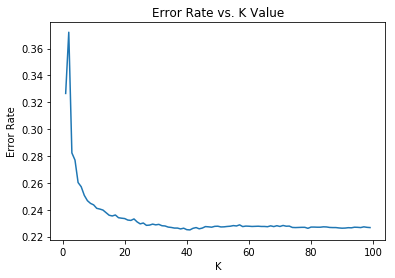

In [42]:
x=range(1,100)
y=error_rate

plt.plot(x,y)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Find the best n_neighbors then re-run with it.

In [43]:
x[y.index(min(y))]

41

In [44]:
knn = KNeighborsClassifier(n_neighbors=(x[y.index(min(y))]))
knn.fit(X_train,y_train)
accuracy = knn.score(X_test, y_test)
print('Accuracy: '+str(accuracy*100)+'%')

Accuracy: 77.49908122013966%


## Predict with KNN with optimal n

In [45]:
'''
knn = KNeighborsClassifier(n_neighbors=(x[y.index(min(y))]))
knn.fit(X_train,y_train)
pred = knn.predict(Lum_topred.drop(['SpType','Absmag','LumClass'], axis=1))
'''

"\nknn = KNeighborsClassifier(n_neighbors=(x[y.index(min(y))]))\nknn.fit(X_train,y_train)\npred = knn.predict(Lum_topred.drop(['SpType','Absmag','LumClass'], axis=1))\n"

In [46]:
'''
def starknn(z):
    if z[0] == 1:
        print("The iris is setosa.\n")
    elif z[0] == 2:
        print("The iris is versicolor.\n")
    elif z[0] == 3:
        print("The iris is versicolor.\n")
    elif z[0] == 4:
        print("The iris is versicolor.\n")
    elif z[0] == 5:
        print("The iris is versicolor.\n")
    elif z[0] == 6:
        print("The iris is versicolor.\n")
    elif z[0] == 7:
        print("The iris is versicolor.\n")
        '''

'\ndef starknn(z):\n    if z[0] == 1:\n        print("The iris is setosa.\n")\n    elif z[0] == 2:\n        print("The iris is versicolor.\n")\n    elif z[0] == 3:\n        print("The iris is versicolor.\n")\n    elif z[0] == 4:\n        print("The iris is versicolor.\n")\n    elif z[0] == 5:\n        print("The iris is versicolor.\n")\n    elif z[0] == 6:\n        print("The iris is versicolor.\n")\n    elif z[0] == 7:\n        print("The iris is versicolor.\n")\n        '

## SVC

In [47]:
from sklearn import preprocessing
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(preprocessing.scale(Lum.drop('LumClass',axis=1)),Lum['LumClass'],
                                                    test_size=0.2)
model = SVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
accuracy = knn.score(X_test, y_test)
print('Accuracy: '+str(accuracy*100)+'%')

Accuracy: 77.68283719220874%


## Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(preprocessing.scale(Lum.drop('LumClass',axis=1)),Lum['LumClass'],
                                                    test_size=0.2)
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
accuracy = knn.score(X_test, y_test)
print('Accuracy: '+str(accuracy*100)+'%')

Accuracy: 77.32451304667401%


# TESTES

In [49]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [50]:
iris = load_iris()
x = iris.data
y = iris.target

#define a function that prints the iris' classification based on the algorithm's output
def classifyiris(z):
    if z[0] == 0:
        print("The iris is setosa.\n")
    elif z[0] == 1:
        print("The iris is versicolor.\n")
    else:
        print("The iris is virginica.\n")

In [51]:
#Using the K Nearest Neighbor Algorithm

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x,y)

z = knn.predict([[3,5,4,2]])
print("Using the k nearest neighbor algorithm =", knn.predict([[3,5,4,2]]))
classifyiris(z)

Using the k nearest neighbor algorithm = [2]
The iris is virginica.



In [52]:
#Using the Logistic Regression Algorithm

lr = LogisticRegression()
lr.fit(x,y)
z = lr.predict([[3,5,4,2]])
print("Using the Logistic Regression algorithm =", lr.predict([[3,5,4,2]]))
classifyiris(z)

Using the Logistic Regression algorithm = [2]
The iris is virginica.



In [53]:
#Using the Decision Tree

decision_tree = tree.DecisionTreeClassifier(criterion='gini')
decision_tree.fit(x,y)
z = decision_tree.predict([[3,5,4,2]])
print("Using the Decision Tree =", decision_tree.predict([[3,5,4,2]]))
classifyiris(z)

Using the Decision Tree = [1]
The iris is versicolor.



In [54]:
#Using Support Vector Classification
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(x,y)
z = svm.predict([[3,5,4,2]])
print("Using the Support Vector Classification =", svm.predict([[3,5,4,2]]))
classifyiris(z)

Using the Support Vector Classification = [1]
The iris is versicolor.



In [55]:
#Using Random Forest

random_forest = RandomForestClassifier()
random_forest.fit(x,y)
z = random_forest.predict([[3,5,4,2]])
print("Using the Random Forest Classification =", random_forest.predict([[3,5,4,2]]))
classifyiris(z)

Using the Random Forest Classification = [1]
The iris is versicolor.

